In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Windows
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
patient_info = pd.read_csv('data/PatientInfo.csv') 

### 대한민국 코로나 현황(확진자 완치자 사망자) 비교

In [5]:
patient_info = patient_info.astype({'confirmed_date':'str'})

In [6]:
# 그래프를 그리기 위해서 object로 되어있는 confirmed_date 컬럼을 str로 변경해주어야합니다. 

In [7]:
patient_info['confirmed_date'] = patient_info['confirmed_date'].apply(lambda x: x[5:7])
patient_info.confirmed_date.unique()

array(['01', '02', '03', '04', '05', '06', ''], dtype=object)

In [8]:
# 일(day)을 기준으로 하면 그래프의 x축이 지나치게 커지기 때문에 달을 기준으로 그래프를 그리기 위해 apply를 적용해서 confirmed_date에서
# 달(month) 값만 가지게 합니다.

In [9]:
patient_group_date = patient_info[patient_info.confirmed_date!=''].groupby('confirmed_date')['state'].count()
patient_group_date

confirmed_date
01      11
02     906
03    1958
04     512
05     606
06       8
Name: state, dtype: int64

In [10]:
#그룹화를 통해서 각 월마다 확진자가 몇명이 있는지 확인 합니다.

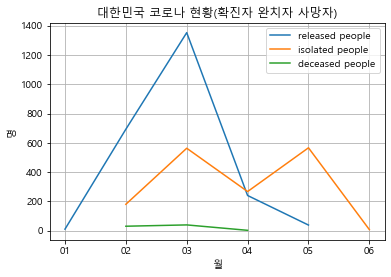

In [11]:
released_people = patient_info[(patient_info.confirmed_date!='') & (patient_info.state=='released')].groupby('confirmed_date')['state'].count()
isolated_people = patient_info[(patient_info.confirmed_date!='') & (patient_info.state=='isolated')].groupby('confirmed_date')['state'].count()
deceased_people = patient_info[(patient_info.confirmed_date!='') & (patient_info.state=='deceased')].groupby('confirmed_date')['state'].count()

plt.plot(released_people, label='released people')
plt.plot(isolated_people, label='isolated people')
plt.plot(deceased_people, label='deceased people')
plt.legend()
plt.grid(True)
plt.title('대한민국 코로나 현황(확진자 완치자 사망자)')
plt.xlabel('월')
plt.ylabel('명')
plt.show()

In [12]:
#confirmed_date 값을 확인해 보면 '' 와 같은 달이 아닌 값이 존재하므로 제외하고, 각 released, isolated, deceased 상태에 따라 그래프를 그립니다.

In [13]:
# 위의 그래프를 통해서 알 수 있는 것은 confirmed_date 만 본다면 각 상태인 released, isolated, deceased에 상관 없이 이 3개의 상태중 하나라도 
# 해당하는 모든 사람은 코로나 확지자 입니다. 왜냐하면 confirmed_date 가 확진으로 판정 받은 날이기 때문입니다. 따라서 3개의 상태중
# 하나라도 해당 되면 그 사람은 코로나 확진자 입니다. 그리고 이를 정의한 뒤에 다시 그래프를 보면 2월에서 3월 사이에 3 상태 모두 크게 증가 했습니다.
# 즉 코로나 확진자가 크게 증가했습니다. 그리고 6월 부터는 데이터가 부족하기에 위와 같이 코로나 확진자가 줄어든 것 처럼 나옵니다.

### 대한민국 코로나 누적 현황(확진자 완치자 사망자) 비교

In [14]:
released_people_accumulated = released_people.copy()
sum = 0
for idx,rpa in enumerate(released_people_accumulated):
    sum+=released_people_accumulated[idx]
    released_people_accumulated[idx]=sum    
released_people_accumulated

isolated_people_accumulated = isolated_people.copy()
sum = 0
for idx,rpa in enumerate(isolated_people_accumulated):
    sum+=isolated_people_accumulated[idx]
    isolated_people_accumulated[idx]=sum    
isolated_people_accumulated

deceased_people_accumulated = deceased_people.copy()
sum = 0
for idx,rpa in enumerate(deceased_people_accumulated):
    sum+=deceased_people_accumulated[idx]
    deceased_people_accumulated[idx]=sum    
deceased_people_accumulated

confirmed_date
02    31
03    71
04    74
Name: state, dtype: int64

In [15]:
# for 문을 이용해서 각 상태에 대한 달마다의 확진자수를 달마다 누적된 확진자 수로 치환해줍니다. sum이라는 변수를 이용해서 변수 안에 
# 각 달마다의 확진자 수를 누적 시켜서 해당하는 달에 입력해줍니다.

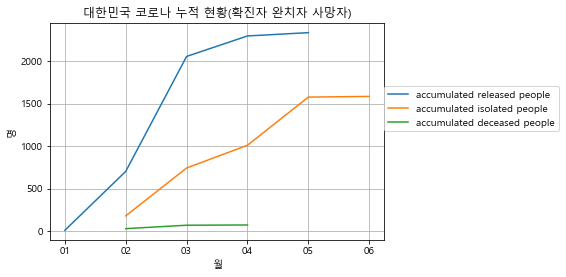

In [16]:
plt.plot(released_people_accumulated, label='accumulated released people')
plt.plot(isolated_people_accumulated, label='accumulated isolated people')
plt.plot(deceased_people_accumulated, label='accumulated deceased people')
plt.title('대한민국 코로나 누적 현황(확진자 완치자 사망자)')
plt.xlabel('월')
plt.ylabel('명')
plt.grid(True)
plt.legend(loc=(1,0.5))
plt.show()

In [17]:
# 누적된 값을 통해서 그래프를 그리면 위와 같은 그래프가 됩니다. 이전의 그래프와 다르게 코로나 확진자의 증가하는 량을 보려면 해당 그래프의
# 기울기를 통해서 확인해야 합니다. 이전의 달에 따른 코로나 확진자의 변화량과 마찬가지로 2월에서 3월 사이에 확진자 의 수가 크게 증가 합니다.

### 월별 신규 코로나 확진자 수 비교

In [18]:
month_patient = patient_info[patient_info['confirmed_date']!=''].groupby('confirmed_date')['patient_id'].count()
month_patient = month_patient.reset_index()
month_patient = month_patient.rename(columns={'patient_id':'count'})
month_patient

,confirmed_date,count
0,01,11
1,02,906
2,03,1958
3,04,512
4,05,606
5,06,8


In [19]:
# 각 상태에 따른 코로나 그래프를 그리는 것이 아닌 순수한 코로나 확진자 수 변화에 대한 그래프를 그리기 위한 전처리 과정입니다.
# 이전과 마찬가지로 confirmed_date의 값중 ''은 달 값이 아니므로 제외하고, confirmed_date를 그룹으로 해서 patient_id 값들을 count해서 각 달에
# 따른 확진자 수를 구합니다. reset_index()를 통해 본래 Serial 타입을 DataFrame 타입으로 변경하고, 컬럼값을 patient_id에서 count 값으로 변경합니다.
# 표를 통해서도 알겠지만 2월 달이 가장 코로나 확진자 수가 많습니다.

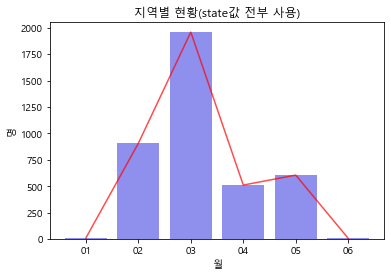

In [20]:
sns.barplot(x='confirmed_date', y='count', data=month_patient, color='blue', alpha=0.5)
sns.lineplot(x='confirmed_date', y='count', data=month_patient, color='red', alpha=0.7)
plt.xticks(rotation=0)
plt.xlabel('월')
plt.ylabel('명')
plt.title('지역별 현황(state값 전부 사용)')
plt.show()

In [21]:
# seaborn을 이용해서 시각화 합니다. 위의 전처리 과정을 거친 month_patient를 통해서 달에 따른 확진자 수에 대한 도수 그래프를 그립니다. 
# 막대 그래프와 꺾은선 그래프 2개를 그렸습니다.

## 지역별 현황(코로나 확진자수)

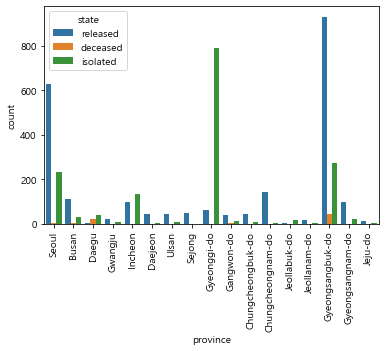

In [22]:
region_index = patient_info[patient_info['confirmed_date']!=''].province.unique()

sns.countplot(x='province', data=patient_info, hue='state')
plt.xticks(range(len(region_index)),region_index,rotation=90) 
plt.show()

In [23]:
# 각 도시에 따른 코로나 확진자 수를 상태 값에 따라 분류해서 seaborn의 countplot으로 구현 했지만 위와 같이 보기가 불편합니다. 

### state를 나누지 않은 경우

In [24]:
province_patient = patient_info[patient_info['confirmed_date']!=''].groupby('province')['patient_id'].count()
province_patient = province_patient.reset_index()
province_patient = province_patient.rename(columns={'patient_id':'count'})
province_patient = province_patient.sort_values(by='count', ascending=False)
province_patient

,province,count
8,Gyeongsangbuk-do,1242
15,Seoul,863
7,Gyeonggi-do,853
10,Incheon,232
2,Chungcheongnam-do,146
0,Busan,144
9,Gyeongsangnam-do,122
3,Daegu,63
5,Gangwon-do,55
1,Chungcheongbuk-do,52


In [25]:
# 상태 값을 신경 쓰지 않고 지역에 따라 확진자 수를 구분하면 위의 표와 같은 도수들을 볼 수 있습니다. 
# patient_info[patient_info['confirmed_date']!=''].groupby('province')['patient_id'].count() 를 통해서 각 달에 따른 확진자 수에 따른 도수를
# 구할 수 있고, reset_index()를 통해 이를 데이터 프레임으로 만들고, rename을 통해 컬럼명을 변경해 주고, sort_values를 통해 count(지역별 확진자 수)
# 에 따라 내림차 순으로 정렬합니다. 

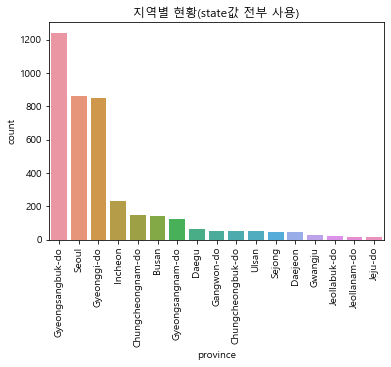

In [26]:
sns.barplot(x='province', y='count', data=province_patient)
plt.xticks(rotation=90)
plt.title('지역별 현황(state값 전부 사용)')
plt.show()

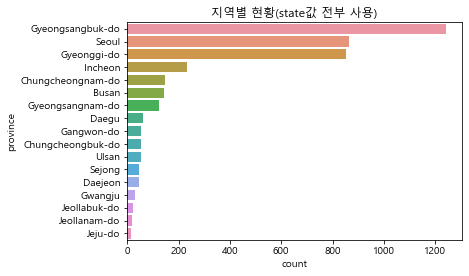

In [27]:
sns.barplot(y='province', x='count', data=province_patient)
plt.title('지역별 현황(state값 전부 사용)')
plt.show()

In [28]:
# x축 방향, y축 방향으로 그려 보았지만, 가독성은 y 값에 province, x값에 count를 적용했을 때가 제일 보기가 좋습니다. 
# 위의 그래프를 보면 1월 ~6월 초까지 확진자가 가장 많이 누적된 지역은 경상북도이며 가장 제일 누적된 지역은 제주도 입니다.

### 지역별 신규 확진자 증가 비교

In [29]:
# 위의 경우 누적된 확진자 수를 막대그래프를 통해서 확인했지만, 이번에는 달마다 변화하는 확진자 수를 각 지역별로 비교해 보겠습니다.

In [30]:
patient_info['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [31]:
# patient_info['province'].unique() 를 통해서 어떤 지역이 존재하는지 파악합니다. 

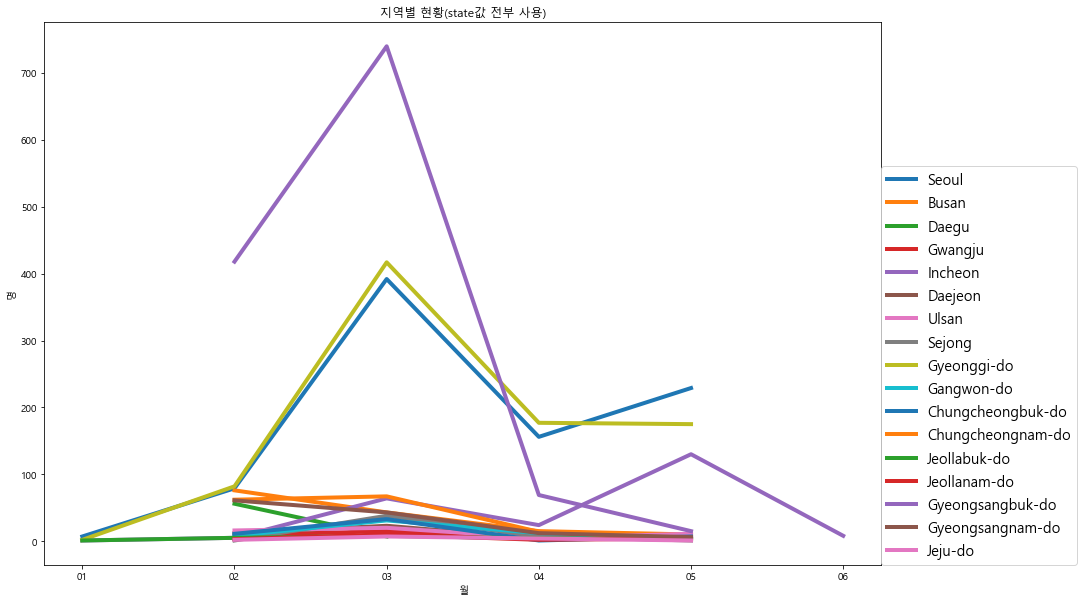

In [32]:
plt.figure(figsize=(15,10))
for region in patient_info['province'].unique():
    region_patient = patient_info[(patient_info['confirmed_date']!='') & (patient_info['province']==region)].groupby('confirmed_date')['patient_id'].count()
    region_patient = region_patient.reset_index()
    region_patient = region_patient.rename(columns={'patient_id':'count'})
    
    sns.lineplot(x='confirmed_date', y='count', data=region_patient, linewidth=4, label=region)

plt.xlabel('월')
plt.ylabel('명')
plt.legend(loc=(1,0), fontsize='x-large')
plt.title('지역별 현황(state값 전부 사용)')
plt.show()

In [33]:
# 위와 같이 그림을 그리다가 그래프가 작아지는 것을 대비하기 위해서 plt.figure(figsize=(15,10))통해서 그래프를 그리는 도화지의 크기를
# 확장시킵니다. 그리고 sns.lineplot을 통해 월에 따른 각 지역의 코로나 확진자 수 의 변화량을 꺾은 선 그래프로 그립니다. 

# 감염 경로 유형별 비교

In [34]:
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,01,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,01,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,01,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,01,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,01,2020-02-24,NaN,released


In [35]:
case_patient = patient_info.groupby('infection_case')['patient_id'].count()
case_patient = case_patient.reset_index()
case_patient = case_patient.rename(columns={'patient_id':'count'})
case_patient = case_patient.sort_values(by='count', ascending=False)
case_patient

,infection_case,count
24,contact with patient,1182
28,overseas inflow,703
25,etc,601
12,Itaewon Clubs,156
8,Guro-gu Call Center,112
21,Shincheonji Church,107
3,Coupang Logistics Center,70
16,Onchun Church,33
0,Bonghwa Pureun Nursing Home,31
26,gym facility in Cheonan,30


In [36]:
# infection_case, 감염된 경로에 따라 그래프를 그리기 위한 전처리 과정을 진행합니다.

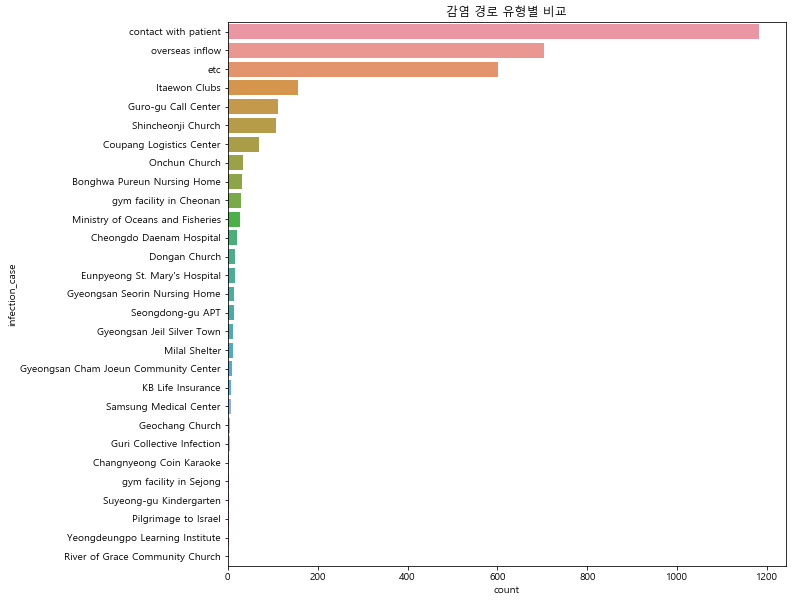

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(y='infection_case', x='count', data=case_patient)
plt.title('감염 경로 유형별 비교')
plt.show()

In [38]:
# 감염 경로 유형별 비교를 보면 contact with patient(확진자와 접촉)이 제일 많았고
# 그 다음으로 많은 건 overseas inflow(해외 입국자)의 건이 두 번째로 많았습니다.
# 세번째로 많은건 etc(기타) 인데 이는 너무 포괄적이다.
# contact with patient, etc 부분에 대해서 문화적인 활동이라 우리는 정의 하겠다.

### 연령대 별로 감염된 경로 비교

In [39]:
patient_copy = patient_info.copy()

In [ ]:
# patient_info 에게 영향을 미치지 않기위해서 copy 한다.

In [40]:
patient_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,01,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,01,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,01,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,01,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,01,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,04,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,04,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,04,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,04,2020-04-26,NaN,released


In [41]:
patient_copy['age'].unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '30', '100s'], dtype=object)

In [ ]:
# 각각의 연령대에 s가 붙어있고 데이터 타입이 str이니 이를 int 형으로 변경해주기 위해
# 아래와 같은 전처리를 실시한다.

In [42]:
patient_copy = patient_copy.dropna(subset=['age'], axis=0)
patient_copy = patient_copy.dropna(subset=['confirmed_date'], axis=0)

In [ ]:
# 우선 각 dropna와 subset을 통해서 인자로 전달한 컬럼에 결측치가 있다면 드랍시킨다.

In [43]:
patient_copy.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,01,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,01,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,01,2020-02-19,NaN,released


In [44]:
patient_copy['age'] = patient_copy['age'].apply(lambda x: int(x[:-1]))

In [ ]:
# 각각의 age 컬럼의 행에 apply를 통해서 s를 떼어내고 str 에서 int로 데이터 타입을 변경한다.

In [45]:
patient_copy['age'].unique()

array([ 50,  30,  20,  60,  80,  70,  40,  10,  90,   0,   3, 100],
      dtype=int64)

In [46]:
patient_group = patient_copy.groupby(['infection_case', 'age'])['patient_id'].count()
patient_group = patient_group.reset_index()
patient_group = patient_group.rename(columns={'patient_id':'count'})
patient_group

,infection_case,age,count
0,Bonghwa Pureun Nursing Home,30,1
1,Bonghwa Pureun Nursing Home,40,1
2,Bonghwa Pureun Nursing Home,50,6
3,Bonghwa Pureun Nursing Home,60,8
4,Bonghwa Pureun Nursing Home,70,2
...,...,...,...
126,overseas inflow,40,58
127,overseas inflow,50,53
128,overseas inflow,60,46
129,overseas inflow,70,6


In [ ]:
# seaborn 그래프를 그리기 위해서 위와 같이 데이터 프레임을 만든다.

In [47]:
infection_label = list(patient_group['infection_case'].unique())
infection_label

['Bonghwa Pureun Nursing Home',
 'Changnyeong Coin Karaoke',
 'Cheongdo Daenam Hospital',
 'Coupang Logistics Center',
 'Dongan Church',
 "Eunpyeong St. Mary's Hospital",
 'Geochang Church',
 'Guro-gu Call Center',
 'Gyeongsan Cham Joeun Community Center',
 'Gyeongsan Jeil Silver Town',
 'Gyeongsan Seorin Nursing Home',
 'Itaewon Clubs',
 'Milal Shelter',
 'Ministry of Oceans and Fisheries',
 'Onchun Church',
 'Pilgrimage to Israel',
 'River of Grace Community Church',
 'Seongdong-gu APT',
 'Shincheonji Church',
 'Suyeong-gu Kindergarten',
 'contact with patient',
 'etc',
 'gym facility in Cheonan',
 'gym facility in Sejong',
 'overseas inflow']

In [ ]:
# 위와 같이 각각의 감염된 경로에 대해서 레이블을 만든다.

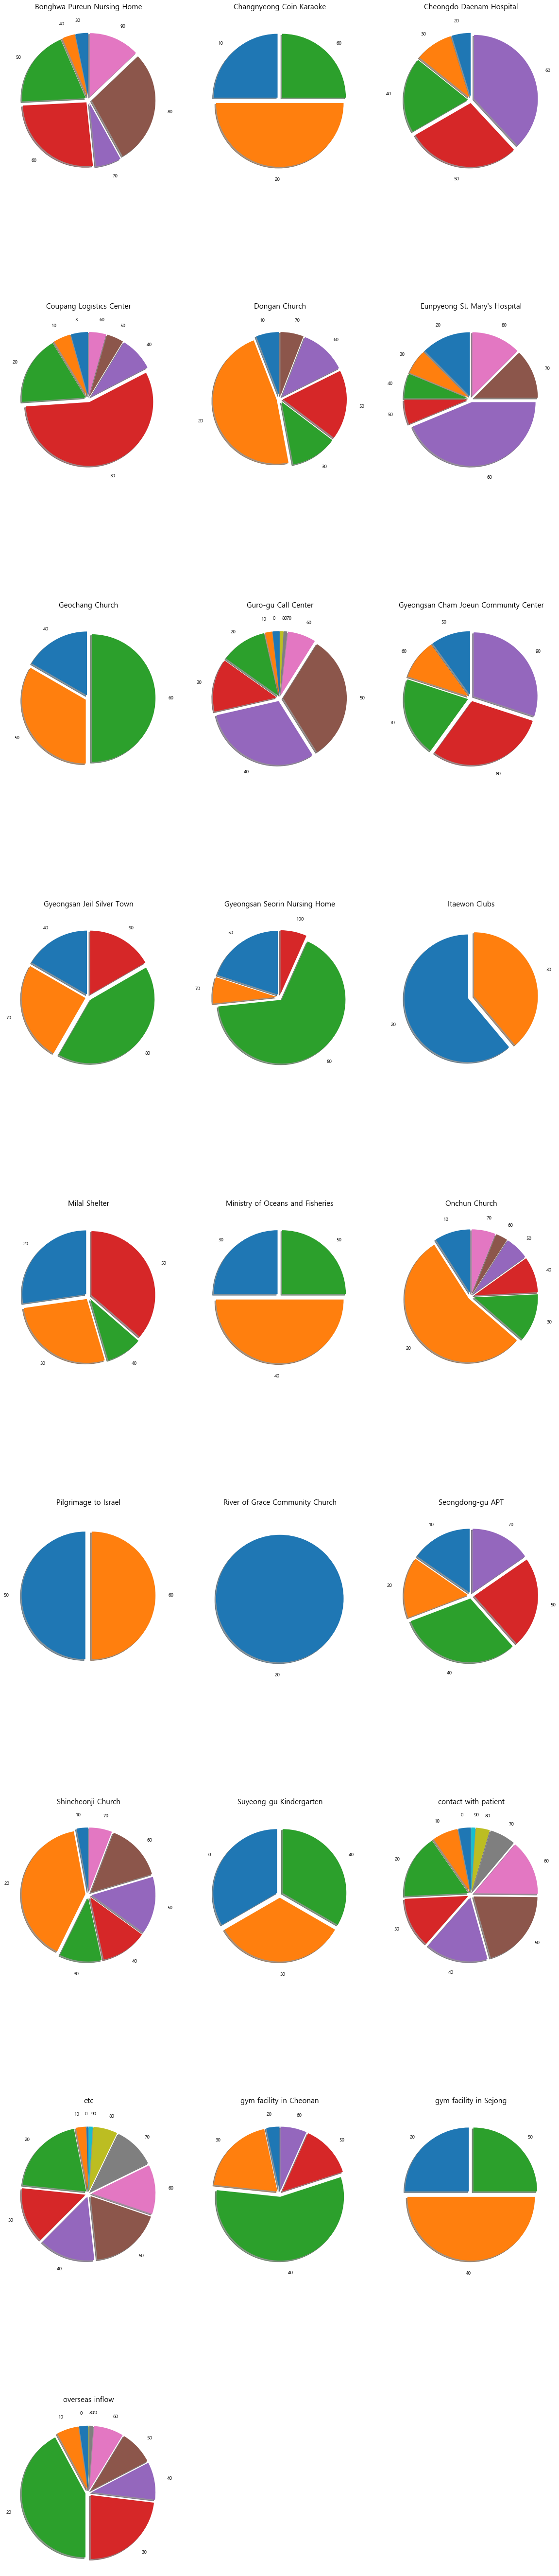

In [49]:
fig, axes = plt.subplots(figsize=(20,100))
idx = 1
for infection in infection_label:
    age_label = list(patient_group[patient_group.infection_case==infection]['age'])
    count_list = list(patient_group[patient_group.infection_case==infection]['count'])
    
    plt.subplot((len(infection_label)//3+1),3,idx)
    plt.subplot((len(infection_label)//3+1),3,idx).set_title(infection, position=(0.5, 1.0+0.05), fontsize=15)
    
    explode = [0.05]*(len(age_label))
    
    plt.pie(count_list, labels=age_label, shadow=True, startangle=90, labeldistance=1.2, explode=explode)
    idx+=1

plt.show()

In [ ]:
# 위의 파이 차트를 만드는 방법은 fig, axes = plt.subplots(figsize=(20,100))을 통해서 
# 그래프를 그릴 도화지를 늘린다. 그 다음 for 문을 통해서 여러번 돌면서 
# 파이 차트를 그린다. 

# for 문안에서 각각의 감염된 경로에 속해 있는 age와 그 count(연령대에 속한 사람수)를 알아낸다.
# 그리고 plt.subplot((len(infection_label)//3+1),3,idx)를 통해서 도화지 내에서 어느 곳에
# 파이 차트를 그릴지 선택한다.
# 두 번째 인자는 한 행에 몇개의 파이 차트를 그릴지 이고, 첫 번째 행은 
# 한 행에 몇개의 파이 차트를 그리면서 몇개의 행을 가질 것인지를 물어본다.
# 그리고 idx의 경우는 전체 첫번째 인자(high) * 두번째 인자(width) 만큼의 파이차트
# 들 속에서 몇번째 파이차트를 그리는 지에 대해서 묻는다.

# explode의 경우는 파이차트에서 그려질 각 연령대의 조각들이 서로 얼만큰 떨어져 있을 지 이다.
# 이는 파이차트에 속하는 연령대의 수만큼 소수점으로 표기한다.

### 지도로 지역별 코로나 확진자 수 표현

In [97]:
import folium

korona_map = folium.Map(location=[37.55,126.98], zoom_start=7)

In [ ]:
# folium은 지도를 그리기 위한 라이브러리 이다.

In [51]:
region_df = pd.read_csv('data/region.csv')
region_df.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [52]:
patient_copy = patient_info.copy()
patient_copy = patient_copy.dropna(subset=['city'], axis=0)
patient_copy

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,01,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,01,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,01,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,01,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,01,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,04,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,04,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,04,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,04,2020-04-26,NaN,released


In [ ]:
# patient_info 에 영향을 줄 수 없으니 copy를 하고 city 부분에 결측치가 있다면 그 행을 제거한다.

In [53]:
patient_group = patient_copy.groupby(['city'])['patient_id'].count()
patient_group = patient_group.reset_index()
patient_group = patient_group.rename(columns={'patient_id':'count'})
patient_group

,city,count
0,Andong-si,53
1,Ansan-si,16
2,Anseong-si,4
3,Anyang-si,35
4,Asan-si,10
...,...,...
151,Yeosu-si,3
152,Yongin-si,78
153,Yongsan-gu,38
154,Yuseong-gu,24


In [ ]:
# 각 도시별로 확진자가 몇 명이 존재하는지 표시하는 데이터 프레임을 만든다.

In [54]:
city_list = patient_group['city'].unique()
city_list

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Cheorwon-gun', 'Chilgok-gun', 'Chuncheon-si', 'Chungju-si',
       'Daedeok-gu', 'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun',
       'Dobong-gu', 'Dong-gu', 'Dongdaemun-gu', 'Dongducheon-si',
       'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun', 'Eunpyeong-gu',
       'Gangbuk-gu', 'Gangdong-gu', 'Ganghwa-gun', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Gapyeong-gun', 'Geochang-gun',
       'Geoje-si', 'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun',
       'Gimcheon-si', 'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun',
       'Gongju-si', 'Goryeong-gun', 'Goseong-gun', 'Goyang-si', 'Gumi-si',
       'Gunpo-si', 'Gunsan-si', 'Gunwi-gun', 'Guri-si', 'Guro-gu',
       'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu', 

In [ ]:
# 아래의 for 문과도 연관이 있는데 아래의 for문에서 클러스터를 만들때
# 데이터에 존재하는 도시의 수만큼 for문을 돌아야 하고, 또한 그 도시에 속하는 코로나 환자 수만큼 
# 또다시 for문을 돌아야 하기 때문에, 데이터에 존재하는 도시의 리스트를 만든다.

In [56]:
import folium

korona_map = folium.Map(location=[37.55,126.98], zoom_start=7)
korona_map

from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(korona_map)

for city in city_list:
    if city in region_df['city'].unique():
        for c in range(patient_group[patient_group['city']==city]['count'].values[0]):
            
            
            lat = region_df[region_df['city']==city]['latitude'].values[0]
            lon = region_df[region_df['city']==city]['longitude'].values[0]

            folium.Marker(location=[lat,lon], popup=city, icon=folium.Icon(color='red', icon='ok')).add_to(marker_cluster)        
korona_map.save('korona_map.html')
# korona_map

In [ ]:
# MarkerCluster 는 folum 지도를 만드는 라이브러리의 플러그인으로,
# 지도를 그릴 때 추가적인 기능을 한다. 가까이 있는 위도 경도 좌표를 가진 점들을
# 모아서 클러스터를 만들고, 지도를 축소 하면 가까이 있는 점들을 모아 커지고,
# 지도를 확대하면 커다랗던 클러스터가 흩어져 그 값이 줄어든다. 
# 클러스터의 값은 모인 점들의 합이다. 즉 여기서는 클러스터 안의 값은 모인 확진자들의 수이다.

### 문화활동을 제일 많이한 코로나 확진자 3명의 이동 경로 그리기

In [57]:
patient_route = pd.read_csv('data/PatientRoute.csv')
patient_route

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
8087,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
8088,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
8089,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
8090,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [58]:
patient_route.type.unique()

array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'academy', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'park', 'lodging', 'university', 'administrative_area_level_1'],
      dtype=object)

In [59]:
not_culture = ['hospital', 'church', 'pharmacy','bank', 'school', 'real_estate_agency',
                  'post_office', 'gas_station', 'university', 'administrative_area_level_1','lodging']

In [ ]:
# not_culture 리스트를 통해서 문화활동이 아닌 type 들을 모은다.

In [60]:
for c in not_culture:
    patient_route['type'] = patient_route['type'].str.replace(c,'') 

In [ ]:
# 위에서 모은 not_culture 리스트에 속한 비 문화 활동을 patient_route['type'] 내에서
# ''으로 바꾼다.

In [61]:
patient_route['type'].unique()

array(['airport', '', 'etc', 'store', 'public_transportation',
       'restaurant', 'beauty_salon', 'pc_cafe', 'academy', 'cafe',
       'bakery', 'bar', 'gym', 'karaoke', 'park'], dtype=object)

In [62]:
patient_route = patient_route[patient_route['type']!='']
patient_route.type.unique()

array(['airport', 'etc', 'store', 'public_transportation', 'restaurant',
       'beauty_salon', 'pc_cafe', 'academy', 'cafe', 'bakery', 'bar',
       'gym', 'karaoke', 'park'], dtype=object)

In [ ]:
문화 활동을 하는 type들만 patient_route에 저장한다. (patient_route.type의 경우에 ''가 비문화 활동이다. 위에서 전처리를 했기 때문이다.)

In [63]:
three_route_patient = patient_route['patient_id'].value_counts().index[0:3]

In [ ]:
# PatientRoute.csv 내에서 가장 이동을 많이 하는 상위 3명의 patient_id를 저장한다.

In [64]:
three_route_patient.values

array([3009000014, 1000000417, 1000000813], dtype=int64)

In [66]:
patient_info[patient_info.patient_id==3009000014]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2356,3009000014,NaN,male,1969,50s,Korea,Gangwon-do,Wonju-si,NaN,Shincheonji Church,NaN,NaN,17,NaN,03,2020-03-28,NaN,released


In [67]:
patient_info[patient_info.patient_id==3009000014]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2356,3009000014,NaN,male,1969,50s,Korea,Gangwon-do,Wonju-si,NaN,Shincheonji Church,NaN,NaN,17,NaN,03,2020-03-28,NaN,released


In [68]:
patient_info[patient_info.patient_id==1000000813]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
812,1000000813,11312.0,NaN,NaN,NaN,Korea,Seoul,etc,NaN,Guri Collective Infection,NaN,NaN,NaN,NaN,05,NaN,NaN,isolated


In [69]:
import folium

trace_map = folium.Map(location=[37.615246,126.715632], zoom_start=16)

color = ['red', 'yellow', 'blue']

for idx, pid in enumerate(three_route_patient.values):
    coords = []
    for lat, lng, type in zip(patient_route[patient_route['patient_id']==pid]['latitude'], patient_route[patient_route['patient_id']==pid]['longitude'], patient_route[patient_route['patient_id']==pid]['type']):
        folium.Marker([lat, lng], popup=type).add_to(trace_map)
        coords.append([lat,lng])

    folium.PolyLine(coords, color=color[idx], opacity=1).add_to(trace_map)

trace_map

In [ ]:
# 3명의 이동 경로를 그린다. 
# folium.Marker를 통해서 그들이 간곳에 대해서 마커로 표시를 하고,
# coords에 그들이 이동한 경로의 위도 경도(latitude, longitude) 값을 저장한다.
# folium.PolyLine 를 통해서 이동 경로를 그린다. 
# folium.PolyLine의 첫번째 인자에는 그들이 이동한 경로의 위도 경도 값들이 저장되어 있어야 한다.

# color = ['red', 'yellow', 'blue']각 3명의 고유의 색을 가지게 하기 위해서 만든다.

### 문화 활동이 코로나 확진자에 미치는 영향에 대한 근거와 20대들의 문화 활동이 코로나 확진자 수에 미치는 영향에 대한 근거

In [70]:
culture_patient = patient_route.copy()

In [ ]:
# patient_route는 위에서 문화 활동만을 위해 이동한 사람들에 대한 경로의 데이터 프레임이다.

In [71]:
len(culture_patient) #전체 문화 루트의 수

5036

In [72]:
patient_info.age.unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '30', '100s'], dtype=object)

In [73]:
patient_copy = patient_info.copy()
patient_copy = patient_copy.dropna(subset=['age'], axis=0)
patient_copy['age'] = patient_copy['age'].apply(lambda x: int(x[:-1]))

In [ ]:
# patient_info에 영향을 주지 않기 위해 copy하고서 
# age에 결측치가 있는 경우 그 행을 제거하고, apply를 이용해 위의 age 값들에서
# s를 떼어내고 int 데이터 타입으로 만든다.

In [74]:
patient_20s_list = patient_copy[patient_copy.age==20]['patient_id'].unique() # 20대 환자들의 아이디 리스트

In [ ]:
# patient_20s_list : 
# patient_info.csv 의 확진자들 중에서 20대인 확진자들의 아이디 값들을 리스트화 한다.

In [75]:
culture_route_person = culture_patient.patient_id.unique() # 문화활동 루트를 돌아다니는 확진자들
culture_route_person, len(culture_route_person)

(array([1000000001, 1000000002, 1000000003, ..., 6100000088, 6100000089,
        6100000090], dtype=int64),
 1071)

In [ ]:
# culture_route_person :
#     문화 활동을 위해 이동하는 확진자들의 아이디 리스트이다.

In [76]:
interaction_20s = set(patient_20s_list)&set(culture_route_person) # 문화활동 루트를 돌아다니는 20대 확진자들의 리스트

In [ ]:
# set 을 이용하면 집합처럼 사용할 수있다.
# interaction_20s : 위의 문화 활동을 위해 이동하는 리스트와 20대 리스트의 교집합
# (20대 이면서 문화 활동을 위해 이동하는 확진자의 아이디) 아이디 리스트를 만든다.

In [77]:
patient_route = pd.read_csv('data/PatientRoute.csv')

In [78]:
patient_route_person = patient_route.patient_id.unique() #이동한 환자들 리스트
len(patient_route_person)

1472

In [ ]:
#patient_route_person : 본래의 문화에 상관 없이 이동하는 모든 활동을 하는 확진자들의 아이디 리스트

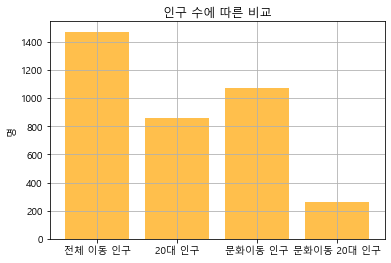

In [102]:
plt.bar(range(4), [len(patient_route_person), len(patient_20s_list), len(culture_route_person), len(interaction_20s)], alpha=0.7, color='orange')
plt.xticks(range(4), ['전체 이동 인구', '20대 인구', '문화이동 인구', '문화이동 20대 인구'])
plt.grid()
plt.ylabel('명')
plt.title('인구 수에 따른 비교')
plt.show()

In [ ]:
# bar 차트를 이용해서 
# 문화 활동을 포함한 모든 활동을 하는 사람들 수 : len(patient_route_person),
# 20 대 인구수 : len(patient_20s_list), 
# 문화 활동 만을 위해 이동하는 사람들의 수 :len(culture_route_person),
# 문화 활동 만을 위해 이동하는 20대 수 : len(interaction_20s)

In [80]:
culture_20s_route = 0 # 20대의 이동한 수를 센다.
for i in culture_patient.patient_id:
    if i in interaction_20s:
        culture_20s_route+=1
print(culture_20s_route)

1276


In [ ]:
# 위의 for 을 통해서 문화 활동 만을 위해서 이동하는 20대 확진자들이
# 이동한 수를 culture_20s_route에 저장한다.

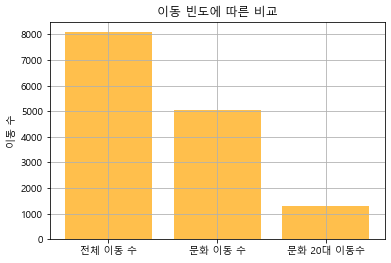

In [101]:
plt.bar(range(3), [len(patient_route), len(culture_patient), culture_20s_route], alpha=0.7, color='orange')
plt.xticks(range(3), ['전체 이동 수', '문화 이동 수', '문화 20대 이동수'])
plt.grid()
plt.ylabel('이동 수')
plt.title('이동 빈도에 따른 비교')
plt.show()

In [ ]:
# len(patient_route) : 문화 활동을 포함한 모든 이동 수 
# len(culture_patient) : 문화 활동 만을 위해 확진자들이 이동하는 수
# culture_20s_route : 문화 활동 만을 위해서 20대 확진자들이 이동하는 수

### 확진자가 이동한 경로중 타입 비교

In [84]:
patient_route['type'].value_counts().index.values

array(['hospital', 'etc', 'store', 'public_transportation', 'restaurant',
       'airport', 'pharmacy', 'church', 'cafe', 'pc_cafe', 'school',
       'lodging', 'bank', 'bakery', 'bar', 'gym', 'academy',
       'beauty_salon', 'real_estate_agency', 'post_office',
       'administrative_area_level_1', 'university', 'gas_station',
       'karaoke', 'park'], dtype=object)

In [ ]:
# 모든 이동 경로에 따른 확지자들이 이동할 타입들

In [86]:
patient_type = patient_route[patient_route['type']!=''].groupby('type')['patient_id'].count().reset_index()
patient_type = patient_type.rename(columns={'patient_id':'count'})
patient_type = patient_type.sort_values(by='count', ascending=False)
patient_type

,type,count
12,hospital,2410
9,etc,2341
23,store,744
19,public_transportation,661
21,restaurant,629
2,airport,286
17,pharmacy,257
8,church,157
7,cafe,132
16,pc_cafe,94


In [ ]:
# 타입 별 확진자들이 이동한 장소에 대한 도수 표이다.

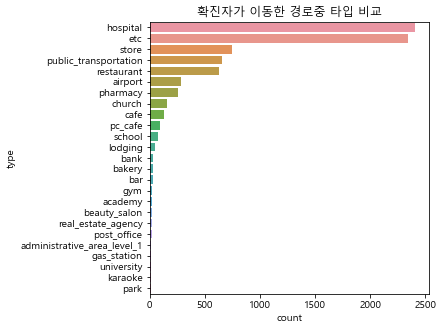

In [87]:
plt.figure(figsize=(5,5))
sns.barplot(y='type', x='count', data=patient_type)
plt.title('확진자가 이동한 경로중 타입 비교')
plt.show()

In [ ]:
# 확진자들이 이동한 타입별 도수에 대한 그래프를 barplot을 이용해서 표현한다.

In [99]:
culture_type = culture_patient[culture_patient['type']!=''].groupby('type')['patient_id'].count().reset_index()
culture_type = culture_type.rename(columns={'patient_id':'count'})
culture_type = culture_type.sort_values(by='count', ascending=False)
culture_type

,type,count
6,etc,2341
13,store,744
11,public_transportation,661
12,restaurant,629
1,airport,286
5,cafe,132
10,pc_cafe,94
2,bakery,29
3,bar,29
7,gym,25


In [ ]:
# 문화 활동 만을 위한 도수 표를 그린다.

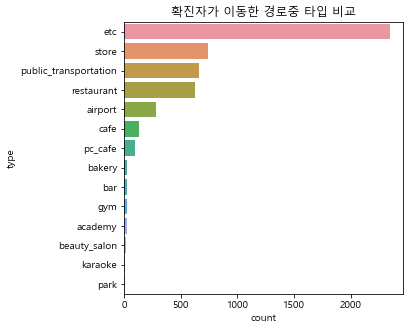

In [100]:
plt.figure(figsize=(5,5))
sns.barplot(y='type', x='count', data=culture_type)
plt.title('확진자가 이동한 경로중 타입 비교')
plt.show()

In [ ]:
# 문화 활동을 하는 사람들이 이동하는 데에 대한 도수 그래프를 그린다.